# 1.行情数据获取
## 1.1 Tushare  https://www.tushare.pro/
Tushare是一个免费、开源的python财经数据接口包。
主要实现对股票等金融数据从数据采集、清洗加工到数据存储的过程，能够为金融分析人员提供快速、整洁、和多样的便于分析的数据，为他们在数据获取方面极大地减轻工作量，使他们更加专注于策略和模型的研究与实现上。考虑到Python pandas包在金融量化分析中体现出的优势，Tushare返回的绝大部分的数据格式都是pandas DataFrame类型，非常便于用pandas/NumPy/Matplotlib进行数据分析和可视化。  

### Tushare获取数据示例：

In [ ]:
pip install tushare

In [10]:
#导入tushare
import tushare as ts
#设置token
ts.set_token('37992891ff469a1570f1eaa3c3d2b9f46334a48192a1f4b200fc636c')
# 确认调用者的ID 给相应权限

In [11]:
#初始化pro接口
pro = ts.pro_api()

In [12]:
#A股日线行情--daily
df = pro.daily(ts_code='000001.SZ,600000.SH', start_date='20210101', end_date='20211231')
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20211231,16.86,16.90,16.40,16.48,16.82,-0.34,-2.0214,1750760.89,2899617.148
1,600000.SH,20211231,8.54,8.57,8.53,8.53,8.54,-0.01,-0.1171,229296.21,195941.582
2,000001.SZ,20211230,16.76,16.95,16.72,16.82,16.75,0.07,0.4179,796663.60,1342374.249
3,600000.SH,20211230,8.54,8.58,8.53,8.54,8.54,0.00,0.0000,232724.84,199031.073
4,000001.SZ,20211229,17.16,17.16,16.70,16.75,17.17,-0.42,-2.4461,1469373.98,2480534.592
...,...,...,...,...,...,...,...,...,...,...,...
481,600000.SH,20210106,9.62,9.83,9.62,9.82,9.68,0.14,1.4463,618813.21,604071.110
482,000001.SZ,20210105,18.40,18.48,17.80,18.17,18.60,-0.43,-2.3118,1821352.10,3284606.913
483,600000.SH,20210105,9.68,9.68,9.52,9.68,9.69,-0.01,-0.1032,538591.77,517135.737
484,000001.SZ,20210104,19.10,19.10,18.44,18.60,19.34,-0.74,-3.8263,1554216.43,2891682.312


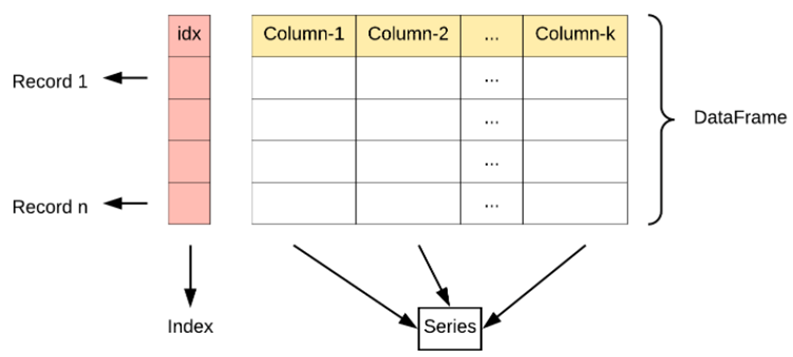

In [13]:
# 利用info获取类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     486 non-null    object 
 1   trade_date  486 non-null    object 
 2   open        486 non-null    float64
 3   high        486 non-null    float64
 4   low         486 non-null    float64
 5   close       486 non-null    float64
 6   pre_close   486 non-null    float64
 7   change      486 non-null    float64
 8   pct_chg     486 non-null    float64
 9   vol         486 non-null    float64
 10  amount      486 non-null    float64
dtypes: float64(9), object(2)
memory usage: 41.9+ KB


In [14]:
#利用 describe 获取数值分布情况
df.describe()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,4.860000e+02
mean,15.146379,15.368148,14.924444,15.151708,15.158601,-0.006893,-0.028752,7.401974e+05,1.249192e+06
std,5.732167,5.882576,5.577850,5.743820,5.744576,0.374222,1.929693,4.556699e+05,1.024098e+06
min,8.480000,8.530000,8.440000,8.480000,8.480000,-1.470000,-6.467700,1.316907e+05,1.137430e+05
25%,9.830000,9.932500,9.690000,9.822500,9.812500,-0.130000,-0.930375,4.003474e+05,4.002035e+05
50%,13.930000,14.070000,13.705000,13.800000,13.935000,-0.010000,-0.113050,6.067091e+05,1.042231e+06
75%,20.580000,20.932500,20.230000,20.560000,20.560000,0.080000,0.627000,9.702547e+05,1.798581e+06
max,24.910000,25.310000,24.520000,25.010000,25.010000,1.700000,8.263200,2.480689e+06,5.679180e+06


In [15]:
df_Inv = df.reindex(index=df.index[::-1])
# a[-1:-len(a)-1:-1]
df_Inv

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
485,600000.SH,20210104,9.64,9.73,9.55,9.69,9.68,0.01,0.1033,629069.39,606364.959
484,000001.SZ,20210104,19.10,19.10,18.44,18.60,19.34,-0.74,-3.8263,1554216.43,2891682.312
483,600000.SH,20210105,9.68,9.68,9.52,9.68,9.69,-0.01,-0.1032,538591.77,517135.737
482,000001.SZ,20210105,18.40,18.48,17.80,18.17,18.60,-0.43,-2.3118,1821352.10,3284606.913
481,600000.SH,20210106,9.62,9.83,9.62,9.82,9.68,0.14,1.4463,618813.21,604071.110
...,...,...,...,...,...,...,...,...,...,...,...
4,000001.SZ,20211229,17.16,17.16,16.70,16.75,17.17,-0.42,-2.4461,1469373.98,2480534.592
3,600000.SH,20211230,8.54,8.58,8.53,8.54,8.54,0.00,0.0000,232724.84,199031.073
2,000001.SZ,20211230,16.76,16.95,16.72,16.82,16.75,0.07,0.4179,796663.60,1342374.249
1,600000.SH,20211231,8.54,8.57,8.53,8.53,8.54,-0.01,-0.1171,229296.21,195941.582


In [16]:
df = pro.daily(ts_code='600600.SH', start_date='20170101', end_date='20211231')
df_1 = df.reindex(index=df.index[::-1])

df_1.rename(columns={'trade_date':'date','vol':'volume'},inplace = True)
df_2 = df_1[['date','open','high','low','close','volume']]
df_2.to_csv("600600_daily_2021.csv", index=False)

## 1.2 Baostock  http://baostock.com/
Baostock是一个免费、开源的证券数据平台（无需注册）。  
提供大量准确、完整的证券历史行情数据、上市公司财务数据等。  
通过python API获取证券数据信息，满足量化交易投资者、数量金融爱好者、计量经济从业者数据需求。  
  **优点：** 免注册 免费  
  **缺点：** 数据种类有限  

## 1.3 AkShare https://www.akshare.xyz/
AkShare 是基于 Python 的开源金融数据接口库，目的是实现对股票、期货、期权、基金、外汇、债券、指数、数字货币等金融产品的基本面数据、实时和历史行情数据、衍生数据从数据采集、数据清洗、到数据落地的一套开源工具，满足金融数据科学家，数据科学爱好者在金融数据获取方面的需求。  
  **优点：** 数据种类丰富，免费  
  **缺点：** 无法批量操作

# 2. 绘制K线图 - mplfinance的应用

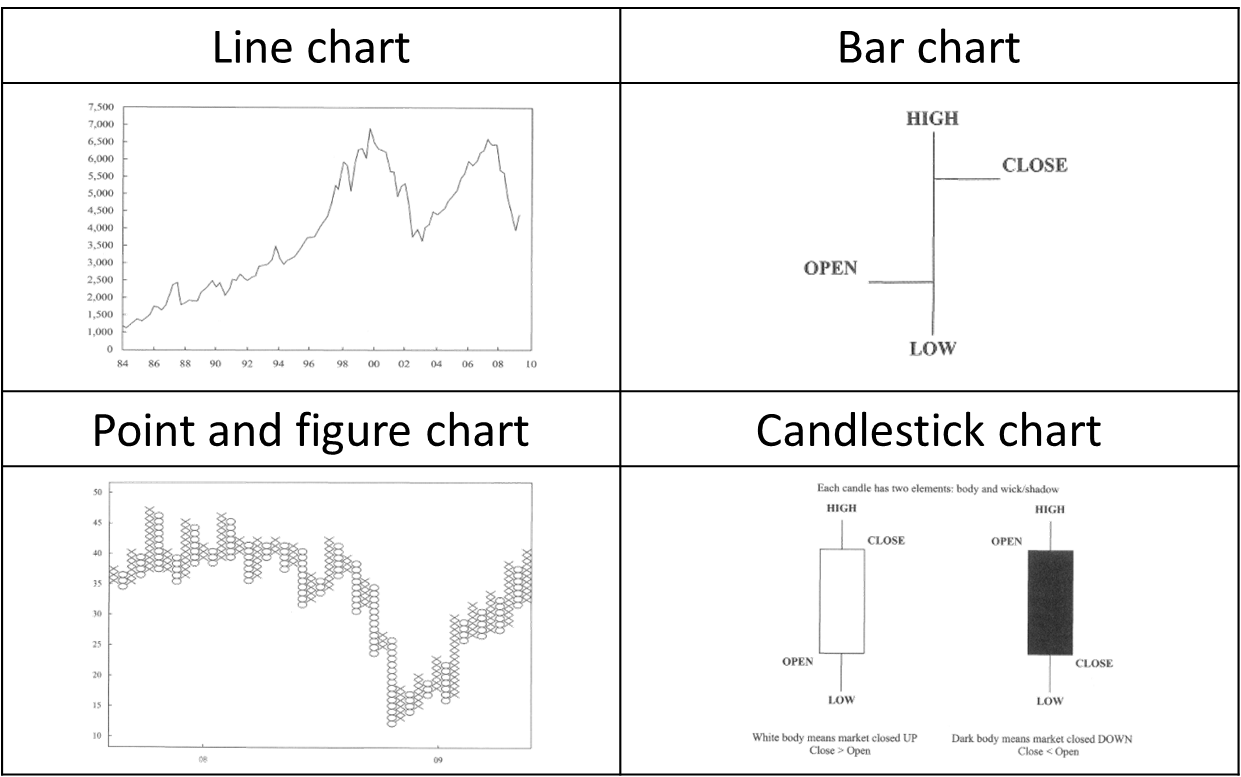

In [1]:
import numpy as np
import pandas as pd
import mplfinance as mpf

import warnings 
warnings.filterwarnings("ignore")

In [4]:
file_name = '600600_daily_2021.csv'
data = pd.DataFrame(pd.read_csv(file_name, index_col=0,parse_dates=True)).dropna()

data

,open,high,low,close,volume
date,,,,,
2017-01-03,29.50,29.80,29.28,29.66,25375.23
2017-01-04,29.65,29.77,29.50,29.68,16930.37
2017-01-05,29.68,29.83,29.55,29.60,25884.37
2017-01-06,29.62,29.69,29.40,29.43,15418.46
2017-01-09,29.47,29.79,29.47,29.75,18905.27
...,...,...,...,...,...
2021-12-27,104.88,106.50,101.00,102.15,41233.85
2021-12-28,102.00,104.83,101.27,104.00,31417.56
2021-12-29,104.60,105.40,99.81,100.50,50642.19


In [5]:
# 时间切片
df=data["2021-01-01":"2021-12-31"]
df.head()

,open,high,low,close,volume
date,,,,,
2021-01-04,99.37,104.87,98.70,102.48,83669.18
2021-01-05,102.48,108.79,101.81,108.00,78577.77
2021-01-06,107.60,109.06,104.80,108.95,72233.13
2021-01-07,108.96,110.70,107.01,109.61,66234.96
2021-01-08,109.03,110.30,103.90,106.50,82377.99


In [11]:
%matplotlib widget
title="600600_2021_Daily"
s = mpf.make_mpf_style(base_mpf_style='classic',rc={'font.family': 'SimHei'})

(<Figure size 960x690 with 4 Axes>,
 [<Axes:ylabel='股价'>, <Axes:>, <Axes:ylabel='Volume'>, <Axes:>])

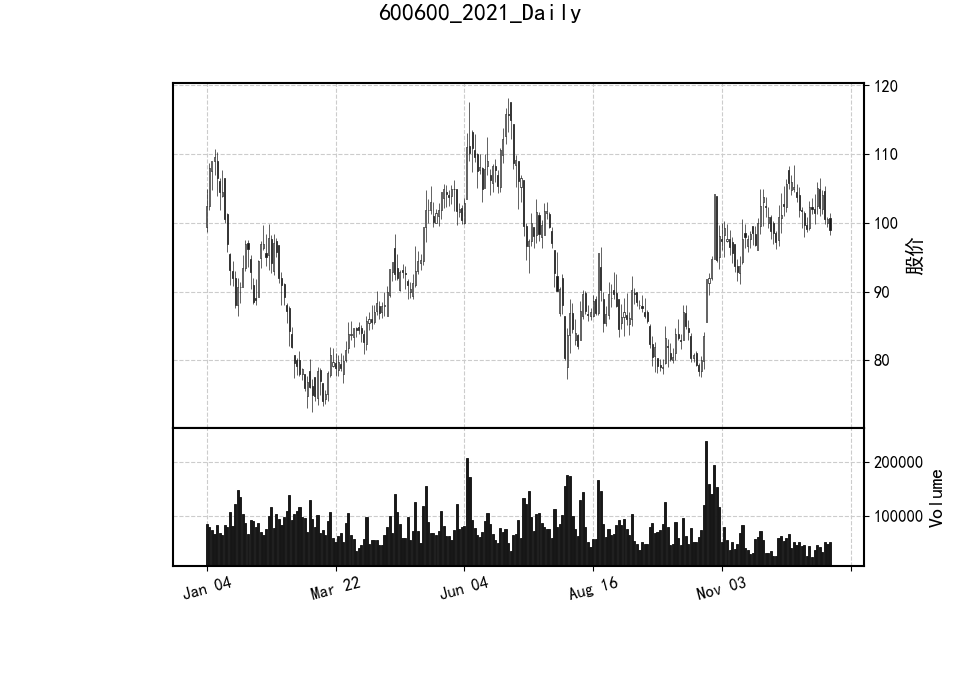

In [12]:
mpf.plot(df, title=title, 
             figscale=1.2,volume=True,type='candle',style=s,ylabel="股价",
             show_nontrading=False,block=False,xrotation=15,returnfig=True)

每一根K先都由高开低收OHLC四个价格组成，有时候有成交量V和开仓量open interest（期货和期权）, 每一根K线都有对应的开盘时间。

如上图所示，每一根K线都由OHLC构成，每一组OHLC表示“一天”，也可以表示成每个“一分钟”，“五分钟”，“一小时”，“一个月”等，取决于原始数据的频率，所以编写指标的时候也需要重新构建一条指标线，线上的点是由各个时间点对应的指标的值来组成。

In [22]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

改进 - 针对中国市场，修改上涨、下跌颜色

In [13]:
mc = mpf.make_marketcolors(up='r',down='g')
s  = mpf.make_mpf_style(base_mpf_style='yahoo',rc={'font.family': 'SimHei'},marketcolors=mc)

(<Figure size 960x690 with 4 Axes>,
 [<Axes:>, <Axes:>, <Axes:ylabel='Volume'>, <Axes:>])

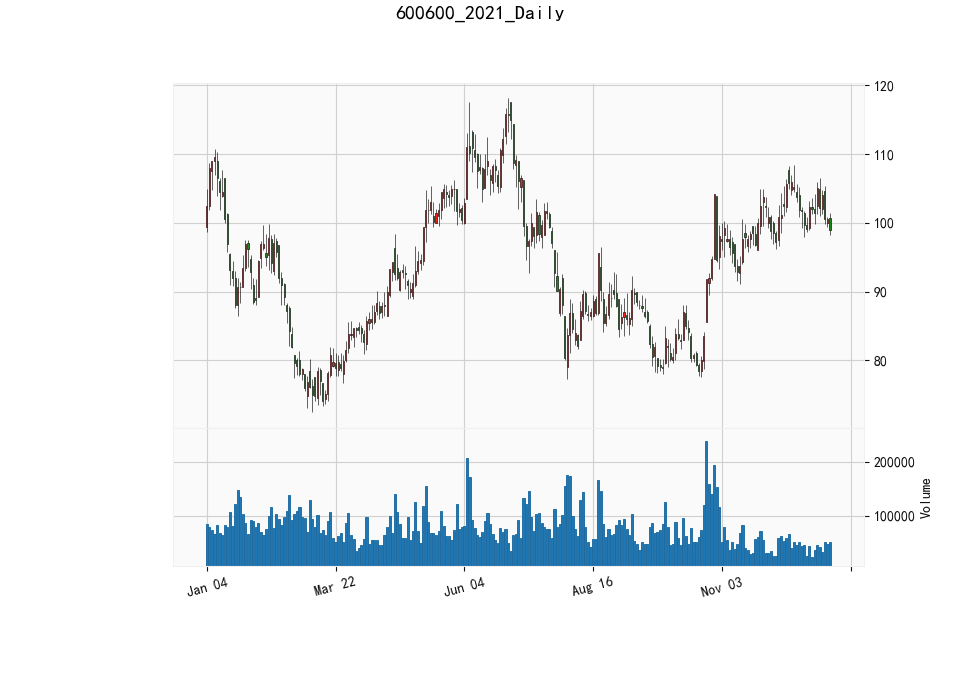

In [14]:
mpf.plot(df, title=title, 
             figscale=1.2,volume=True,type='candle',style=s,ylabel="",
             show_nontrading=False,block=False,xrotation=15,returnfig=True)

改进 - 添加支撑位与阻力位

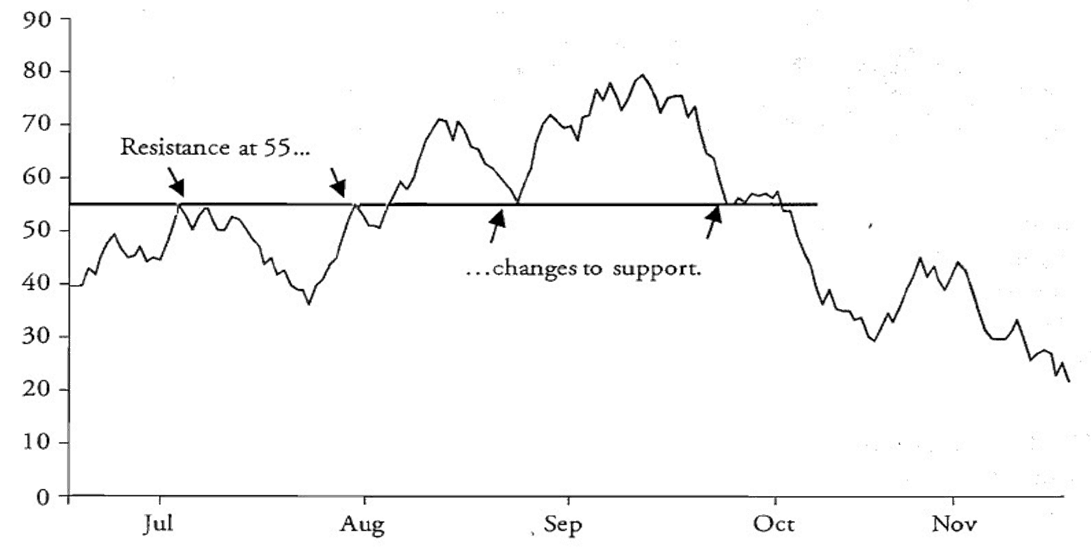

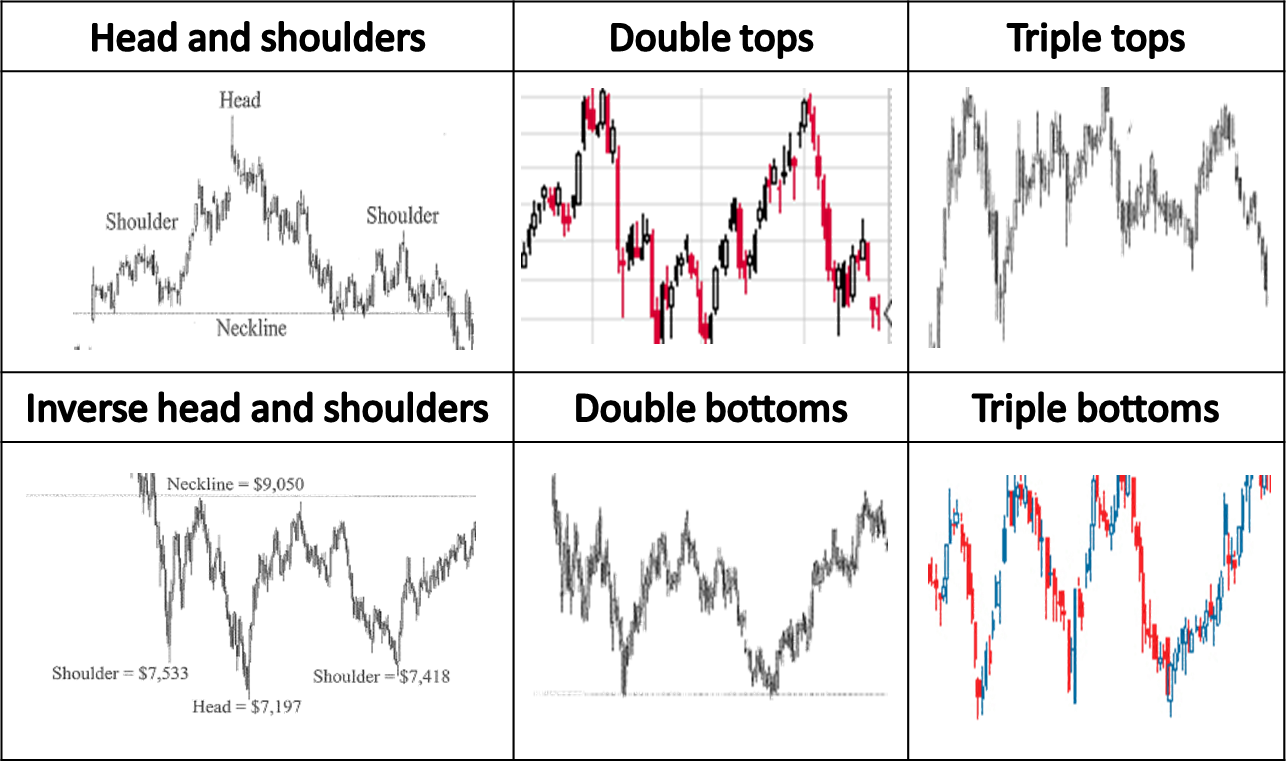

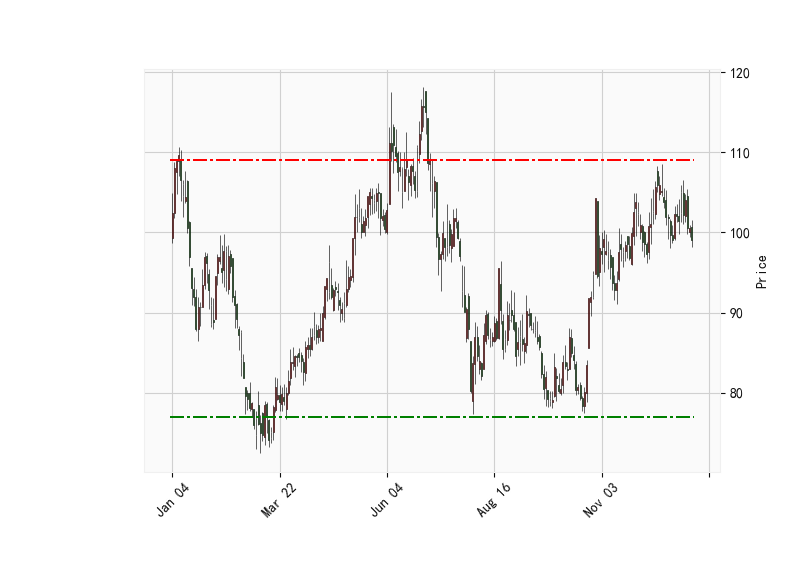

In [10]:
# 水平线就一个参数，水平高度，修改颜色及线条
mpf.plot(df,type='candle',style=s,hlines=dict(hlines=[77,109],colors=['g','r'],linestyle='-.'))

改进 - 添加交易日期

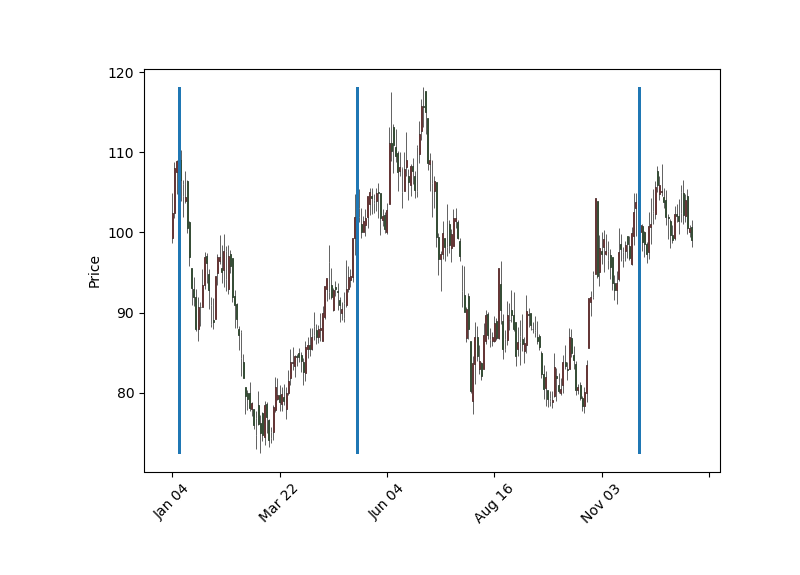

In [26]:
# 垂直线就一个参数，时间
mpf.plot(df,type='candle',style=s, vlines=dict(vlines=['2021-1-07','2021-05-17','2021-11-27'],linewidths=(1,1,1)))

# 3. 指标编写：简单均线

SMA：
+ 每一天都有一个SMA变量，与OHLC平行存在
+ SMA是基于当天的OHLC或与历史OHLC合并，通过固定公式计算形成

大多数软件将当天的坐标记为0，昨天的坐标记为-1，前天的记为-2， 大前天的记为-3，以此类推

## 3.1 用for循环语句编写指标

In [27]:
df_SMA = df.copy()

In [28]:
df_SMA['SMA1']=np.NaN
df_SMA

,open,high,low,close,volume,SMA1
date,,,,,,
2021-01-04,99.37,104.87,98.70,102.48,83669.18,NaN
2021-01-05,102.48,108.79,101.81,108.00,78577.77,NaN
2021-01-06,107.60,109.06,104.80,108.95,72233.13,NaN
2021-01-07,108.96,110.70,107.01,109.61,66234.96,NaN
2021-01-08,109.03,110.30,103.90,106.50,82377.99,NaN
...,...,...,...,...,...,...
2021-12-27,104.88,106.50,101.00,102.15,41233.85,NaN
2021-12-28,102.00,104.83,101.27,104.00,31417.56,NaN
2021-12-29,104.60,105.40,99.81,100.50,50642.19,NaN


In [29]:
# %%timeit

for i in range(4,len(df_SMA)):
    df_SMA['SMA1'][i]=(df_SMA['close'][i]+df_SMA['close'][i-1]+df_SMA['close'][i-2]+df_SMA['close'][i-3]+df_SMA['close'][i-4])/5

df_SMA

,open,high,low,close,volume,SMA1
date,,,,,,
2021-01-04,99.37,104.87,98.70,102.48,83669.18,NaN
2021-01-05,102.48,108.79,101.81,108.00,78577.77,NaN
2021-01-06,107.60,109.06,104.80,108.95,72233.13,NaN
2021-01-07,108.96,110.70,107.01,109.61,66234.96,NaN
2021-01-08,109.03,110.30,103.90,106.50,82377.99,107.108
...,...,...,...,...,...,...
2021-12-27,104.88,106.50,101.00,102.15,41233.85,102.600
2021-12-28,102.00,104.83,101.27,104.00,31417.56,102.946
2021-12-29,104.60,105.40,99.81,100.50,50642.19,102.636


In [30]:
df['close'][0:5].mean()

107.10799999999999

## 3.2 用内置语句rolling编写指标

In [31]:
# %%timeit
n1=5
#滑动窗口
df_SMA['SMA1_']=df.close.rolling(n1).mean()

df_SMA

,open,high,low,close,volume,SMA1,SMA1_
date,,,,,,,
2021-01-04,99.37,104.87,98.70,102.48,83669.18,NaN,NaN
2021-01-05,102.48,108.79,101.81,108.00,78577.77,NaN,NaN
2021-01-06,107.60,109.06,104.80,108.95,72233.13,NaN,NaN
2021-01-07,108.96,110.70,107.01,109.61,66234.96,NaN,NaN
2021-01-08,109.03,110.30,103.90,106.50,82377.99,107.108,107.108
...,...,...,...,...,...,...,...
2021-12-27,104.88,106.50,101.00,102.15,41233.85,102.600,102.600
2021-12-28,102.00,104.83,101.27,104.00,31417.56,102.946,102.946
2021-12-29,104.60,105.40,99.81,100.50,50642.19,102.636,102.636


一般情况下，使用pandas内置的语句，即向量化语句效率更高一些。
上两个单元格中 %%timeit 表示计算单元格多次执行所需要的时间，明显，使用pandas内置语句更加有效一些，但是传统语句能够更加清晰地说明算法的计算过程。

## 3.3 利用第三方库talib编写指标 https://www.lfd.uci.edu/~gohlke/pythonlibs/
talib（Technical Analysis Library）－－功能是计算股价的技术分析指标  
各种指标的计算过程已经被库模式化，可以使用已经做好的库来实现。

In [ ]:
pip install TA-Lib

In [32]:
pip install C:\Users\WangQingchao\Downloads\TA_Lib-0.4.24-cp39-cp39-win_amd64.whl

Processing c:\users\wangqingchao\downloads\ta_lib-0.4.24-cp39-cp39-win_amd64.whl
TA-Lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [33]:
import talib as ta

In [34]:
df_SMA['SMA1__'] = ta.SMA(df.close,5)

df_SMA

,open,high,low,close,volume,SMA1,SMA1_,SMA1__
date,,,,,,,,
2021-01-04,99.37,104.87,98.70,102.48,83669.18,NaN,NaN,NaN
2021-01-05,102.48,108.79,101.81,108.00,78577.77,NaN,NaN,NaN
2021-01-06,107.60,109.06,104.80,108.95,72233.13,NaN,NaN,NaN
2021-01-07,108.96,110.70,107.01,109.61,66234.96,NaN,NaN,NaN
2021-01-08,109.03,110.30,103.90,106.50,82377.99,107.108,107.108,107.108
...,...,...,...,...,...,...,...,...
2021-12-27,104.88,106.50,101.00,102.15,41233.85,102.600,102.600,102.600
2021-12-28,102.00,104.83,101.27,104.00,31417.56,102.946,102.946,102.946
2021-12-29,104.60,105.40,99.81,100.50,50642.19,102.636,102.636,102.636


## 3.4 添加均线指标至图像中

In [35]:
add_plot=[
        mpf.make_addplot(df_SMA['SMA1'],type='line',color='blue')    
]

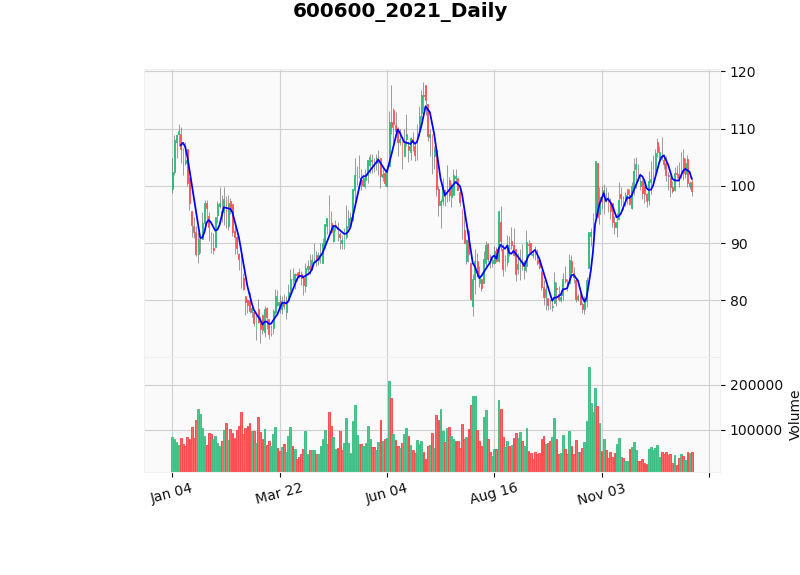

In [36]:
mpf.plot(df_SMA,
             figscale=1,volume=True,type='candle',style='yahoo',ylabel="",title=title,
             show_nontrading=False,addplot=add_plot,block=False,xrotation=15)

In [37]:
# 计算且可视化另一条均线
n2=10

df_SMA['SMA2']=df_SMA.close.rolling(n2).mean()

df_SMA

,open,high,low,close,volume,SMA1,SMA1_,SMA1__,SMA2
date,,,,,,,,,
2021-01-04,99.37,104.87,98.70,102.48,83669.18,NaN,NaN,NaN,NaN
2021-01-05,102.48,108.79,101.81,108.00,78577.77,NaN,NaN,NaN,NaN
2021-01-06,107.60,109.06,104.80,108.95,72233.13,NaN,NaN,NaN,NaN
2021-01-07,108.96,110.70,107.01,109.61,66234.96,NaN,NaN,NaN,NaN
2021-01-08,109.03,110.30,103.90,106.50,82377.99,107.108,107.108,107.108,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-27,104.88,106.50,101.00,102.15,41233.85,102.600,102.600,102.600,101.916
2021-12-28,102.00,104.83,101.27,104.00,31417.56,102.946,102.946,102.946,101.939
2021-12-29,104.60,105.40,99.81,100.50,50642.19,102.636,102.636,102.636,101.802


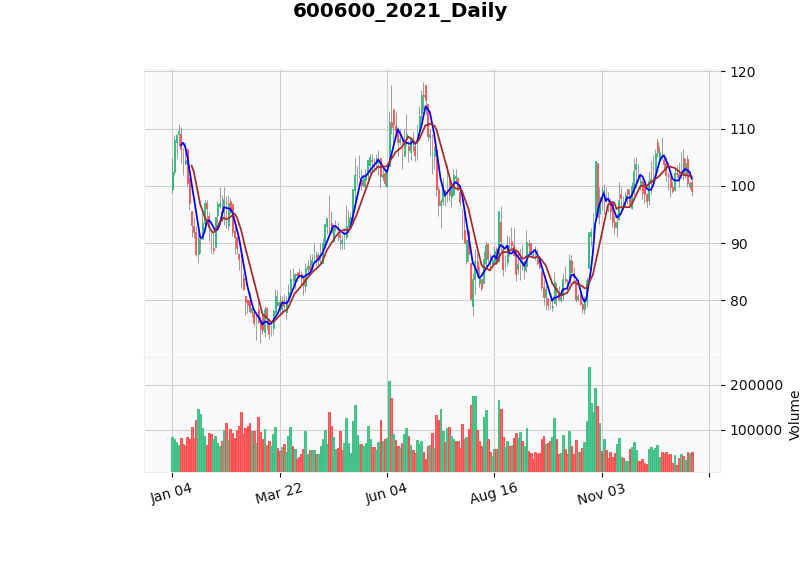

In [38]:
add_plot=[
        mpf.make_addplot(df_SMA['SMA1'],type='line',color='blue'), 
        mpf.make_addplot(df_SMA['SMA2'],type='line',color='brown'),    
    
]

mpf.plot(df_SMA,
             figscale=1,volume=True,type='candle',style='yahoo',ylabel="",title=title,
             show_nontrading=False,addplot=add_plot,block=False,xrotation=15)

直接使用plot()中参数

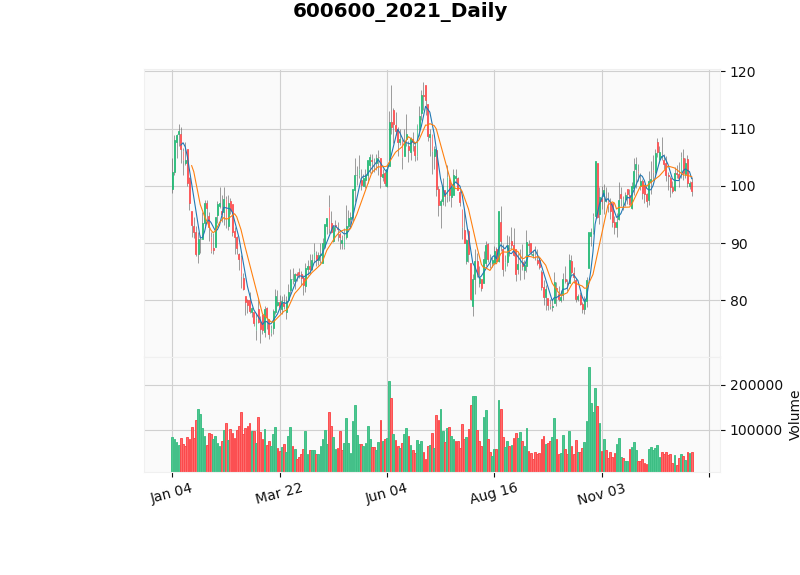

In [41]:
mpf.plot(df_SMA,
             figscale=1,volume=True,type='candle',style='yahoo',ylabel="",title=title,
             show_nontrading=False,mav=(5,10),block=False,xrotation=15)